In [3]:
import json
import csv
import tweepy
import re
import os
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
from os import chdir
from glob import glob
import pandas as pdlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#import preprocessor as p
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')
#from preprocessor import api



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/willhawkins/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ModuleNotFoundError: No module named 'unicode'

In [6]:
consumer_key = os.environ.get("TWITTER_CONSUMER_KEY")
consumer_secret = os.environ.get("TWITTER_CONSUMER_SECRET")
access_token = os.environ.get("TWITTER_ACCESS_TOKEN")
access_token_secret = os.environ.get("TWITTER_TOKEN_SECRET")



In [7]:

"""
INPUTS:
    consumer_key, consumer_secret, access_token, access_token_secret: codes 
    telling twitter that we are authorized to access this data
    hashtag_phrase: the combination of hashtags to search for
OUTPUTS:
    none, simply save the tweet info to a spreadsheet
"""
def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase):
    
    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth, wait_on_rate_limit = True)
    
    #get the name of the spreadsheet we will write to
    fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))

    #open the spreadsheet we will write to
    with open('hastag%s.csv'%(fname),'w') as file:
        w = csv.writer(file)

        #write header row to spreadsheet
        w.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'followers_count'])

        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets', \
                                   lang="en", tweet_mode='extended').items():
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), [e['text'] for e in tweet._json['entities']['hashtags']], tweet.user.followers_count])

In [ ]:
hashtag_phrase = input('')

if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase)

Covid_19


In [22]:
# Coronavirus Twitter perception is one of my research interests
csv_file_path = '/Users/willhawkins/Desktop/twitter_scraper'
chdir(csv_file_path)

In [24]:
# This code loops through all .csv files from unique API calls or "Twitter Scrapes". This is important because the
# scraping code needs to be executed several times because Twitter API rate limits how much data can be scraped
# in any given 15 minute period
file_pattern = "csv"
list_of_files = [file for file in glob('*.{}'.format(file_pattern))]



['March_9th.csv', 'March_13_1.csv', 'March_13.csv', 'combined_csv.csv', 'March_10.csv', 'March_9_1.csv', 'March_5_2.csv', 'March_5_3.csv', 'march_4th.csv', 'March_6th.csv', 'march_5th.csv']


In [25]:
# This code consolidates all .csv files into one
def produceOneCSV(list_of_files, file_out):
   # Consolidate all CSV files into one object
   result_obj = pdlib.concat([pdlib.read_csv(file) for file in list_of_files])
   # Convert the above object into a csv file and export
   result_obj.to_csv(file_out, index=False, encoding="utf-8")

file_out = "ConsolidateOutput.csv"
produceOneCSV(list_of_files, file_out)

In [34]:
# reading the .csv into a pandas data frame
df = pd.read_csv("ConsolidateOutput.csv")
df.head(20)

,timestamp,tweet_text,username,all_hashtags,followers_count
0,2020-03-10 00:17:46,b'@DoYourBestNY88 @nowthisnews Not positive bu...,b'RayMarty89',[],210
1,2020-03-10 00:17:45,b'@VanityFair Trump would be happy some large ...,b'annedelim',[],97
2,2020-03-10 00:17:43,b'@sabaatahir Our president ended his message ...,b'Lovatic4lliiffe',[],199
3,2020-03-10 00:17:42,b'I spent the day advising the citizens of Aus...,b'Plaid_Morrison',[],2344
4,2020-03-10 00:17:42,"b""#QAnon, you're wrong about Bill Gates creati...",b'Robin_of_Aniara',['QAnon'],1091
5,2020-03-10 00:17:42,b'\xe2\x80\xbcBreaking News: Governor Ron DeSa...,b'VivianaJaner',['Coronavirus'],878
6,2020-03-10 00:17:41,"b""@vitaliykulikov @martinfowler Denial doesn't...",b'xor_freecity',[],93
7,2020-03-10 00:17:41,"b'If you buy this machine to make masks, you w...",b'1chtttt',[],18
8,2020-03-10 00:17:40,"b""@nhk_news A:Be infected with COVID-19 B:Had ...",b'Ad992Lang',[],2
9,2020-03-10 00:17:39,b'How to clean your phone properly https://t.c...,b'techjunkiejh',['TechJunkieNews'],29079


In [ ]:
### Quick and easy Tweet Cleaning Function
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub(r'[^\x00-\x7f]',r'', text) #Removing non-ASCI characters
    
    return text

# Applying cleaner filter function
df['cleaned_tweets'] = df['tweet_text'].apply(cleanTxt)

# Show the cleaned tweets
#print(df['cleaned_tweets'].head(20))
#print(df['tweet_text'].head(20))

In [36]:
# This block of codes help quantify sentiment of emoticons and provides a more in depth tweet cleaning function than
# the previous cleaning funtion. You can use either or both...

#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])


#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

#combine sad and happy emoticons
# This may be useful in your sentimate detection project...
emoticons = emoticons_happy.union(emoticons_sad)

def clean_tweets(tweet):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
#after tweepy preprocessing the colon symbol left remain after      #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
#replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
#remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
#filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
#looping through conditions
    for w in word_tokens:
#check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)
    print(word_tokens)
    #print(filtered_sentence)return tweet

df['cleaned_tweets'] = df['tweet_text'].apply(clean_tweets)
#print(df['twice_cleaned_tweets'].head(20))

In [37]:
df.head(20)

,timestamp,tweet_text,username,all_hashtags,followers_count,cleaned_tweets
0,2020-03-10 00:17:46,b'@DoYourBestNY88 @nowthisnews Not positive bu...,b'RayMarty89',[],210,b DoYourBestNY88 nowthisnews Not positive expo...
1,2020-03-10 00:17:45,b'@VanityFair Trump would be happy some large ...,b'annedelim',[],97,b VanityFair Trump would happy large states fu...
2,2020-03-10 00:17:43,b'@sabaatahir Our president ended his message ...,b'Lovatic4lliiffe',[],199,b sabaatahir Our president ended message Covid...
3,2020-03-10 00:17:42,b'I spent the day advising the citizens of Aus...,b'Plaid_Morrison',[],2344,b I spent day advising citizens Australia rega...
4,2020-03-10 00:17:42,"b""#QAnon, you're wrong about Bill Gates creati...",b'Robin_of_Aniara',['QAnon'],1091,b '' QAnon 're wrong Bill Gates creating COVID...
5,2020-03-10 00:17:42,b'\xe2\x80\xbcBreaking News: Governor Ron DeSa...,b'VivianaJaner',['Coronavirus'],878,b'\xe2\x80\xbcBreaking News Governor Ron DeSan...
6,2020-03-10 00:17:41,"b""@vitaliykulikov @martinfowler Denial doesn't...",b'xor_freecity',[],93,b '' vitaliykulikov martinfowler Denial n't he...
7,2020-03-10 00:17:41,"b'If you buy this machine to make masks, you w...",b'1chtttt',[],18,b'If buy machine make masks make money soon Co...
8,2020-03-10 00:17:40,"b""@nhk_news A:Be infected with COVID-19 B:Had ...",b'Ad992Lang',[],2,b '' nhk_news A Be infected COVID-19 B Had con...
9,2020-03-10 00:17:39,b'How to clean your phone properly https://t.c...,b'techjunkiejh',['TechJunkieNews'],29079,b'How clean phone properly https //t.co/ZI6xYv...


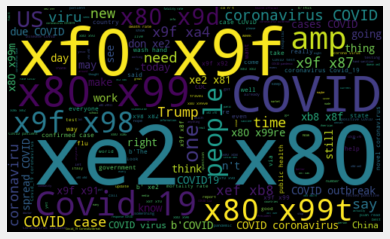

<Figure size 432x288 with 0 Axes>

In [23]:
# Sentiment Distribution tweets

allWords = ' '.join([twts for twts in df['twice_cleaned_tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


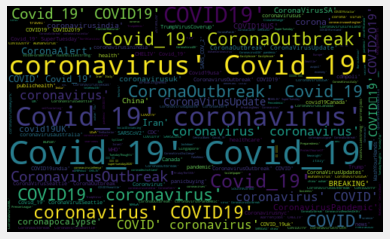

In [14]:
# sentiment distribution hashtags
df['cleaned_hashtags'] = df['all_hashtags'].apply(cleanTxt)


allWords_2 = ' '.join([twts for twts in df['cleaned_hashtags']])
wordCloud_2 = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords_2)


plt.imshow(wordCloud_2, interpolation="bilinear")
plt.axis('off')
plt.show()


In [185]:
### Sentiment Detection
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['tweet_text'].apply(getSubjectivity)
df['Polarity'] = df['tweet_text'].apply(getPolarity)

In [188]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

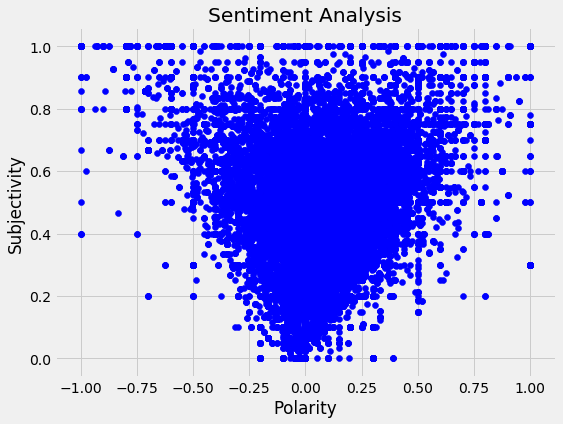

AttributeError: 'DataFrame' object has no attribute 'Analysis'

In [187]:
# Plotting
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
 plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

# Show the value counts
df['Analysis'].value_counts()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()


In [189]:
plt.savefig('books_read.png')

,timestamp,tweet_text,username,all_hashtags,followers_count,cleaned_hashtags,Subjectivity,Polarity,Analysis
0,2020-03-10 00:17:46,b'@DoYourBestNY88 @nowthisnews Not positive bu...,b'RayMarty89',[],210,[],0.540584,0.171266,Positive
1,2020-03-10 00:17:45,b'@VanityFair Trump would be happy some large ...,b'annedelim',[],97,[],0.650893,0.497321,Positive
2,2020-03-10 00:17:43,b'@sabaatahir Our president ended his message ...,b'Lovatic4lliiffe',[],199,[],1.000000,0.600000,Positive
3,2020-03-10 00:17:42,b'I spent the day advising the citizens of Aus...,b'Plaid_Morrison',[],2344,[],0.100000,-0.100000,Negative
4,2020-03-10 00:17:42,"b""#QAnon, you're wrong about Bill Gates creati...",b'Robin_of_Aniara',['QAnon'],1091,['QAnon'],0.900000,-0.500000,Negative
...,...,...,...,...,...,...,...,...,...
48979,2020-03-05 15:00:46,"b'""California\xe2\x80\x99s state of emergency ...",b'Borinquens',[],109,[],0.144444,-0.077778,Negative
48980,2020-03-05 15:00:45,b'Public Health: World Health Organization iss...,b'LS_Medical',"['Coronavirus', 'PRC', 'China', 'WHO']",296,"['Coronavirus', 'PRC', 'China', 'WHO']",0.466667,0.085714,Positive
48981,2020-03-05 15:00:44,b'First defense against coronavirus: 20 second...,b'AltiusBusiness',"['coronavirus', 'COVID']",6,"['coronavirus', 'COVID']",0.216667,0.125000,Positive
48982,2020-03-05 15:00:44,"b""@girlsreallyrule That's not true. Everyone c...",b'Athena19900212',[],0,[],0.523864,0.038068,Positive


Helpful Resources
https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf
https://www.youtube.com/watch?v=ujId4ipkBio    